In [21]:
#### REMOVE in README.md ####
import JGV as package
from IPython.core.display import display, Markdown
display(Markdown("# {} {} package documentation\n".format(package.__name__, package.__version__)))
display(Markdown("\n---\n"))
display(Markdown("\n**{}**\n".format(package.__description__)))
display(Markdown("\n---\n"))
display(Markdown("{}\n".format(package.__long_description__)))
display(Markdown("* Author: {} - {}\n".format(package.__author__, package.__email__)))
display(Markdown("* URL: {}\n".format(package.__url__)))
display(Markdown("* Licence: {}\n".format(package.__licence__)))
#############################

# JGV 1.0a2 package documentation



---



**JGV is an embed genomic viewer for Jupyter notebook written in python3**



---


JGV is a lightweight genomic viewer, taking advantage of maplotlib python library to generate annotation and
sequencing coverage plots. The genomic interval plotting method is higly customizable and allow users to analyse their results in a jupyter
notebook directly. The package can parse a variety of standard annotation file (bed, gff3, gtf...) and compute the sequencing coverage
from SAM or BAM files as well as from bed coverage files


* Author: Adrien Leger - aleg@ebi.ac.uk


* URL: https://github.com/a-slide/JupyterGenoViewer


* Licence: GPLv3


# Installation

Ideally, before installation, create a clean python3 virtual environment to deploy the package, using virtualenvwrapper for example (see http://www.simononsoftware.com/virtualenv-tutorial-part-2/).

In [20]:
#### REMOVE in README.md ####
import JGV as package
from IPython.core.display import display, Markdown
if "__install_requires__" in package.__dict__:
    display(Markdown("## Python packages dependencies:\n"))
    for dep in package.__install_requires__:
        display(Markdown("* {}\n".format(dep)))
#############################

## Python packages dependencies:


* numpy>=1.11.1


* pandas>=0.18.1


* matplotlib>=1.5.1


* pysam>= 0.9.0


* notebook>=4.0.0


* pycl>=1.0.3


## Installation with pip from github

Install the package with pip3. All the required dependencies will be automatically installed.

In [ ]:
pip3 install git+https://github.com/a-slide/JupyterGenoViewer.git --process-dependency-links

To update the package:

In [ ]:
pip3 install git+https://github.com/a-slide/JupyterGenoViewer.git --upgrade --process-dependency-links

# Usage

The package is meant to be used in a jupyter notebook 4.0.0 +

## Notebook setup

Launch the notebook in a terminal

In [ ]:
jupyter notebook

If it does not autolaunch your web browser, open manually the following URL http://localhost:8888/tree 

From Jupyter home page you can navigate to the directory you want to work in. Then, create a new Python3 Notebook.

In the notebook, import matplotlib and use the jupyter magic command to enable direct plotting in the current Notebook.

In [36]:
import matplotlib.pyplot as pl
%matplotlib inline

Default pylab parameters can be defined at the beginning of the notebook as well (see http://matplotlib.org/users/customizing.html for more options)

In [37]:
pl.rcParams['figure.figsize'] = 20,7
pl.rcParams['font.family'] = 'sans-serif'
pl.rcParams['font.sans-serif'] = ['DejaVu Sans']
pl.style.use('ggplot')

## Using JGV

JGV is first initialized with a reference genome. Then annotation and alignment files can be added. Finally, coverage and feature localization plots can be generated.

Each function has specific options that are comprehensively detailed in the testing notebook provided with the package or in html version on nbviewer: [Test_notebook](https://nbviewer.jupyter.org/github/a-slide/JupyterGenoViewer/blob/master/JGV/JGV_Test_Notebook.ipynb?flush_cache=true)

### Import package

In [24]:
from JGV.JGV import JGV

One can also import the jprint and jhelp function from pycoQC to get a improve the default print and help function in jupyter

In [25]:
from JGV.JGV import jhelp, jprint

A sample test file can be loaded from the package as well

In [26]:
example_bam = JGV.example_bam()
example_fasta = JGV.example_fasta()
example_gtf = JGV.example_gtf()
example_gff3 = JGV.example_gff3()

jprint(example_bam)
jprint(example_fasta)
jprint(example_gtf)
jprint(example_gff3)

### Initialize JGV with a reference genome

JGV starts by creating a Reference object from a fasta file

In [27]:
j = JGV(fp=example_fasta, verbose=True)

One can also give a list of chromosomes to select in the fasta file

In [28]:
j = JGV(fp=example_fasta, verbose=True, ref_list=["I","II","III"])

Finally, instead of a fasta file, one can provide a tab separated index file containing at least 2 columns with the refid(chromosome name) and the length of the sequence, such as a fasta index create by faidx or with the *output_index* option of JGV

In [29]:
j = JGV(fp=example_fasta, verbose=True, output_index=True)

In [30]:
index = "/home/aleg/Programming/Python3/JupyterGenoViewer/JGV/data/yeast.tsv"
j = JGV(index, verbose=True)

### Adding annotation files

Once initialized a JGV object can parse and save annotation files (gff3, gtf and bed).

In [31]:
j.add_annotation(example_gtf, name="yeastMine")

Several annotation can be loaded. Warnings will be thrown if there are chromosomes found in the reference sequence have no feature in the annotation file

In [32]:
j.add_annotation(example_gff3, name="Ensembl")

Information about the annotations can be obtained with annotation_summary

In [33]:
j.annotation_summary()

,Feature count,Refid count,Feature type count
yeastMine,42071,17,6
Ensembl,28872,17,15


,yeastMine,Ensembl
refid,,
I,744,509
II,2867,1961
III,1174,809
IV,5290,3601
IX,1537,1062
Mito,306,257
V,2081,1434
VI,916,636
VII,3739,2565


,yeastMine,Ensembl
type,,
CDS,7050.0,7050.0
chromosome,NaN,17.0
exon,7553.0,7553.0
gene,7126.0,6692.0
mRNA,NaN,6692.0
ncRNA_gene,NaN,15.0
pseudogene,NaN,42.0
rRNA,NaN,16.0
rRNA_gene,NaN,16.0


### Adding alignment files

JGV objects can also parse and compute the coverage from alignment files (bam, sam and bed).

In [34]:
j.add_alignment(example_bam, name="RNA-Seq")

Similar to annotation, JGV also has an alignment_summary function

In [35]:
j.alignment_summary()

,Refid count,Base coverage
RNA-Seq,17,4051804


,RNA-Seq
XII,710501
VII,517868
IV,433392
XV,334195
II,271983
XVI,260855
XI,253186
VIII,236955
X,207338
V,203852


### Generate a plot of coverage per refid

Simple visualization to have a first idea of the sequencing coverage, with many customization options

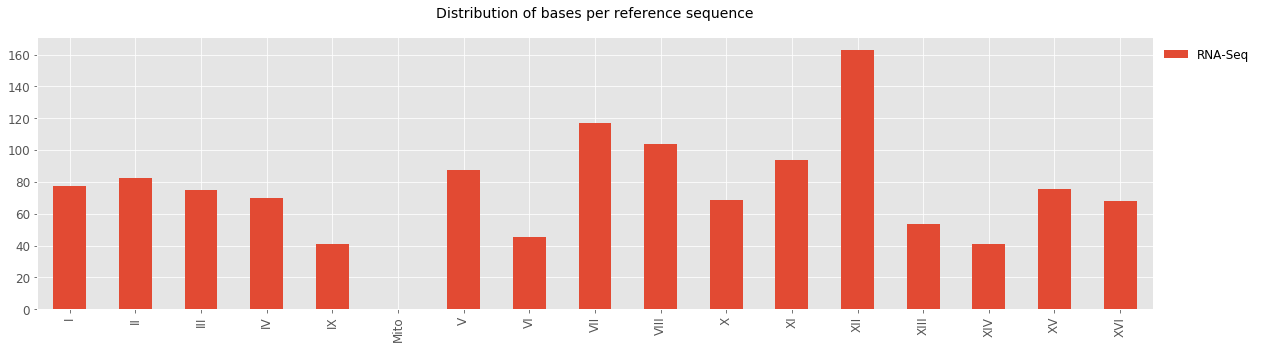

In [24]:
r = j.refid_coverage_plot()

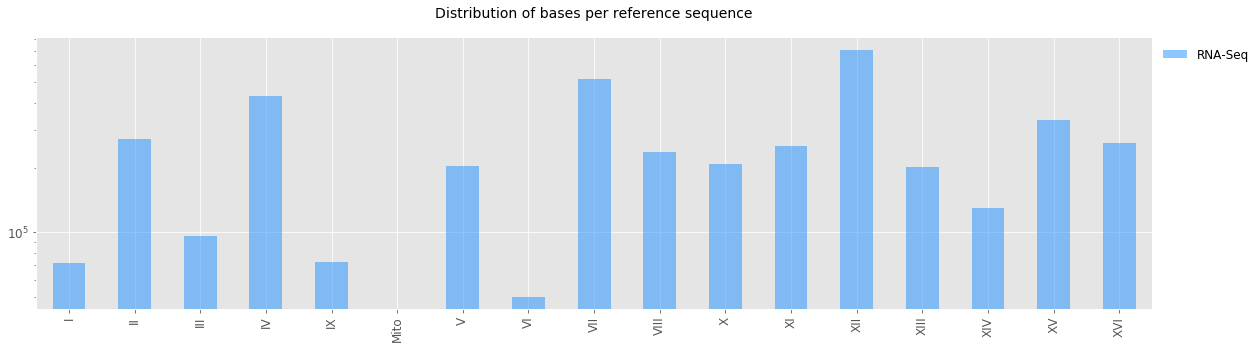

In [31]:
r = j.refid_coverage_plot(norm_depth=False, norm_len=False, log=True, color="dodgerblue", alpha=0.5)

### Plotting the coverage and annotation features of a specific window

interval_plot is undoubtedly the most useful function of the package. It has a large panel of option to customize the plots and will adapt automatically to plot all the annotation and alignment coverage over a defined genomic interval or an entire chromosome

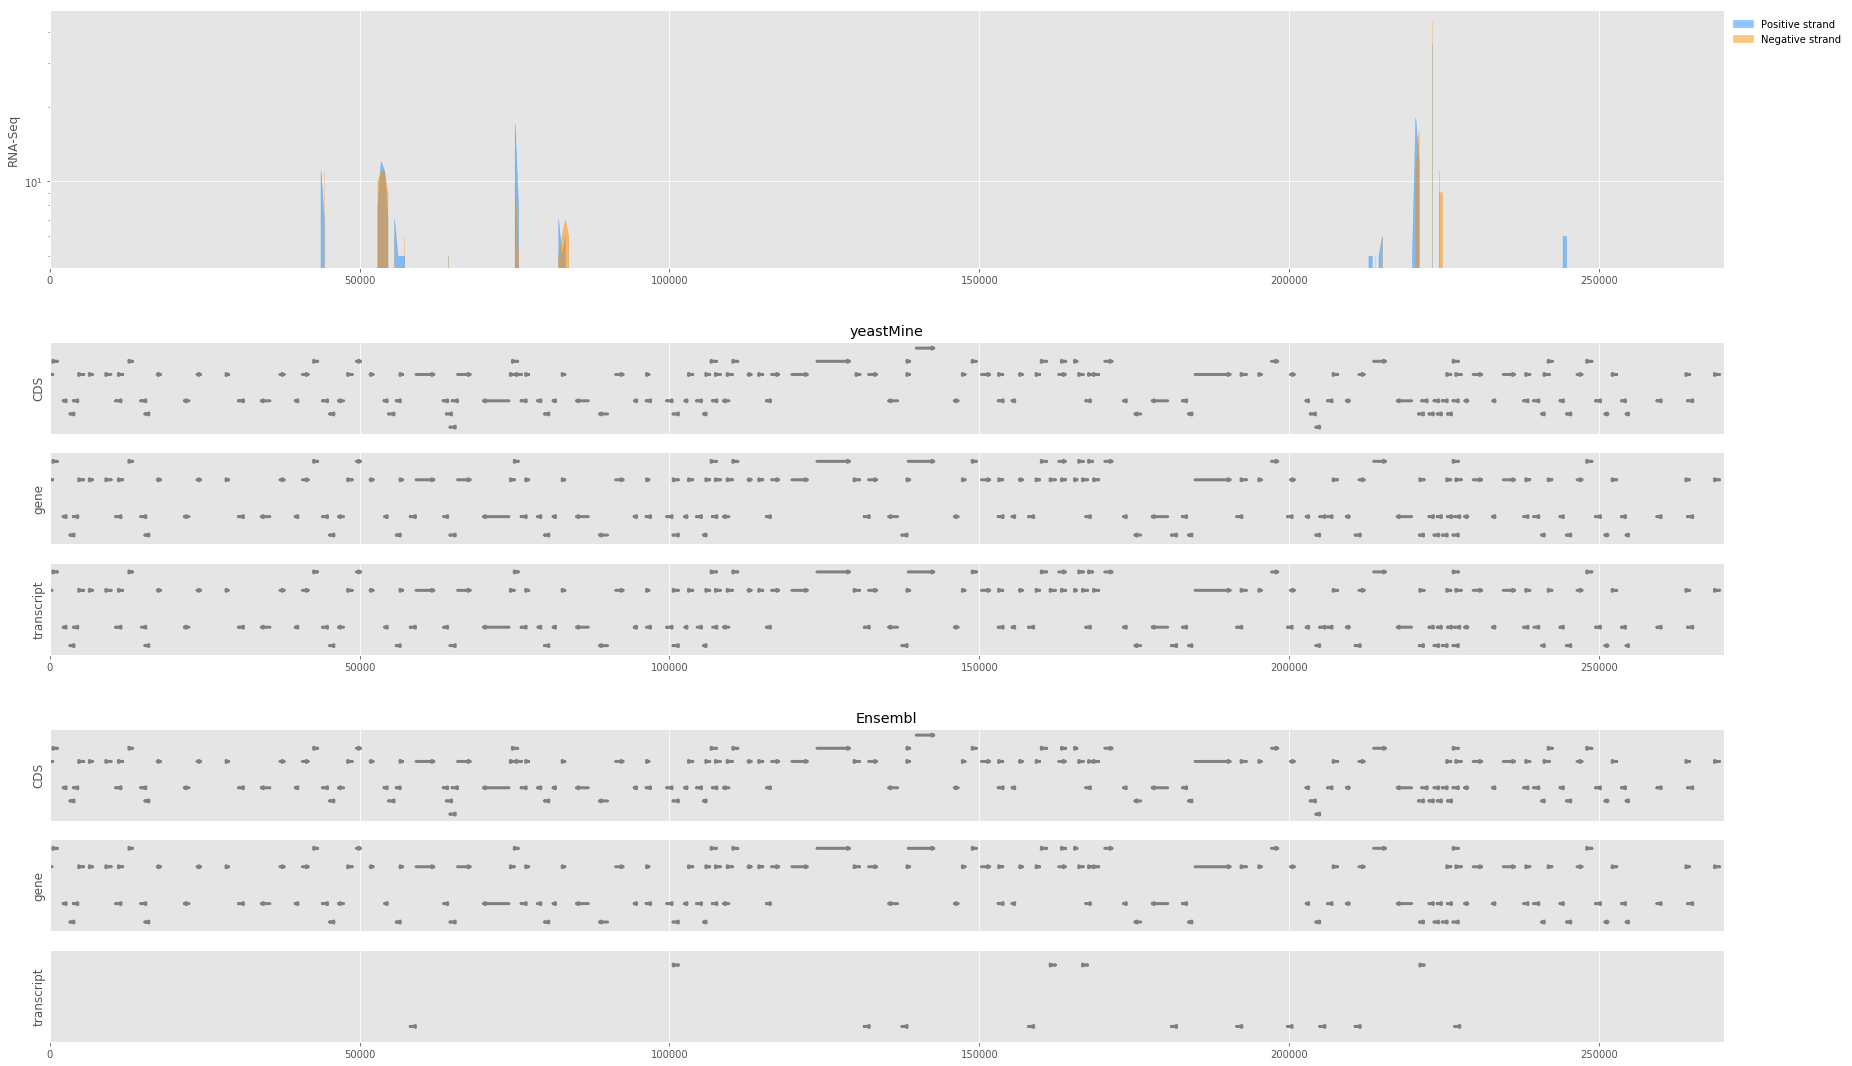

In [33]:
j.interval_plot("VI", feature_types=["gene", "transcript", "CDS"])

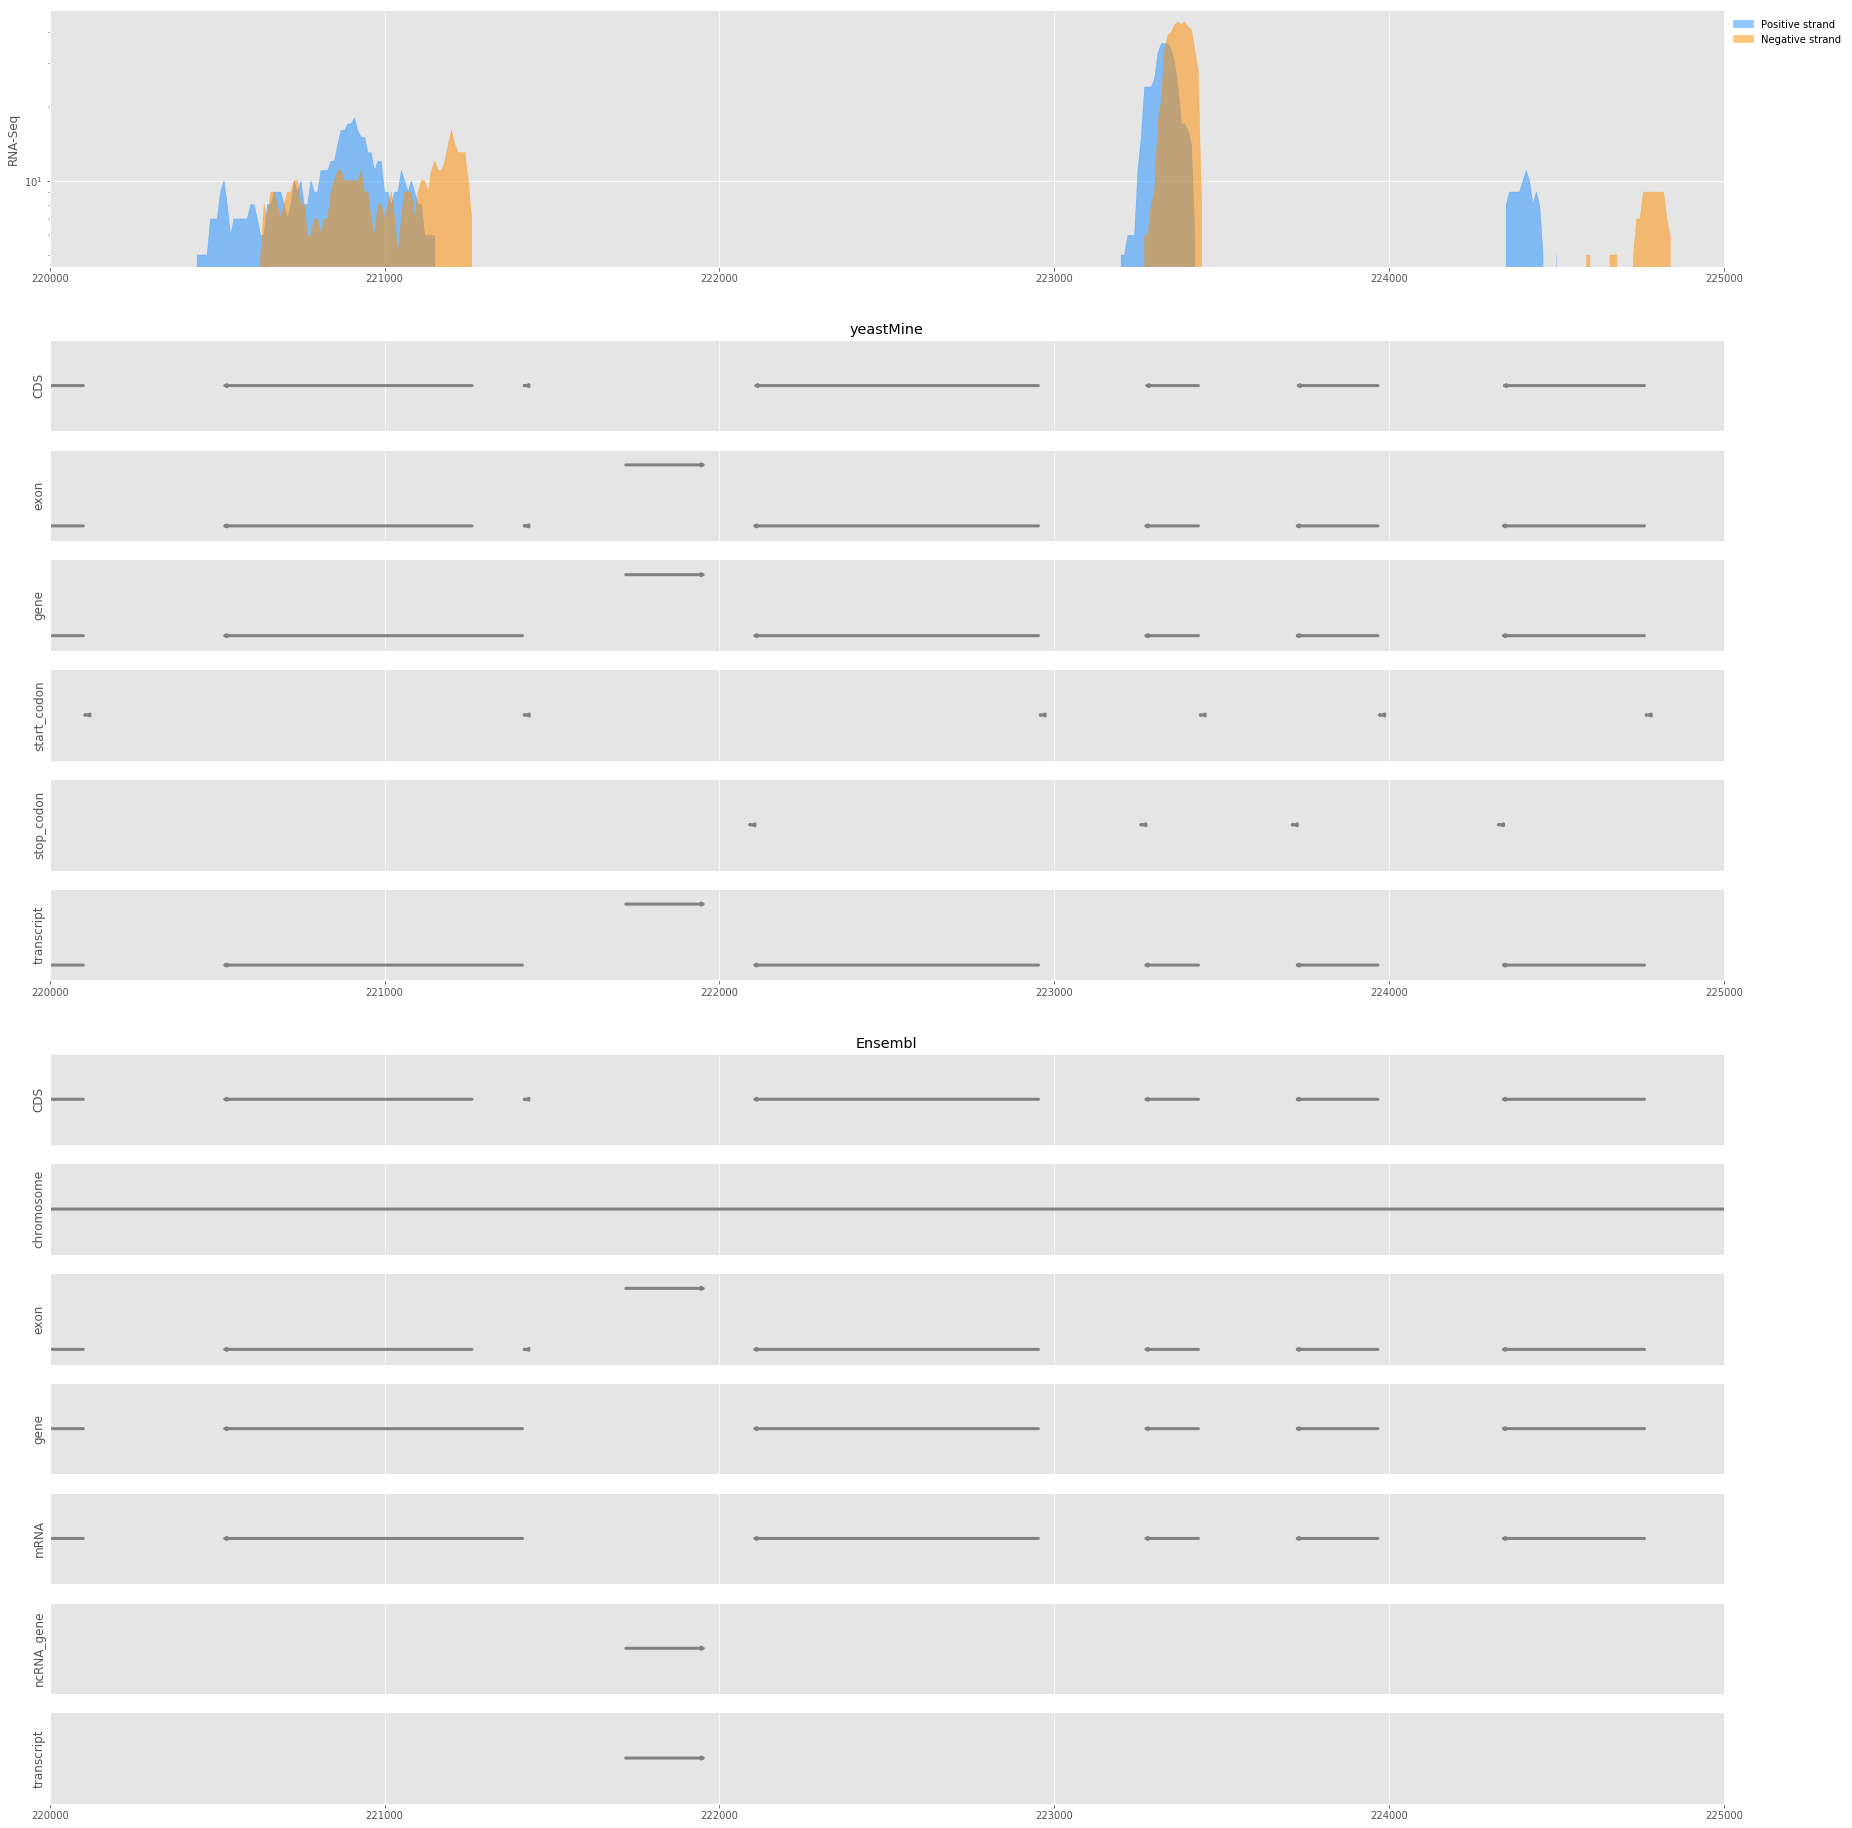

In [37]:
j.interval_plot("VI", start=220000, end=225000)

# Note to developers

You are welcome to contribute by requesting additional functionalities, reporting bugs or by forking, and submitting a pull request.

Thank you

# Authors and Contact

Adrien Leger - 2017

Enright's group, EMBL EBI

* <aleg@ebi.ac.uk>
* [Github](https://github.com/a-slide)